# Data Analysis for DLA

## Part 1 - Radial Estimation
The data in `data.csv` is read, and the number of particles plotted against the radius.

For fractals the number of particles $N$ required to create a fractal of size $R$ is

$ N = \frac{R}{a}^d $,

where $a$ is the size of the particles. More generally this equation relates to $r_{max}=r$ the with constants $\alpha$ and $\beta$

$ N = (\alpha r)^d - \beta$.

By taking $\log$ of either side we can obtain the linear equation

$ \log(N) = d\log(r) + C$,

where the constant $C$ takes care of $\beta$ and $\alpha$. Plotting a log-log graph of $N$ and $r$ should give a straight line with gradient $d$.

In [1]:
from boxcount import *

figure_folder = "../Report/Figures/"

fsize = 15
tsize = 18

tdir = 'in'

major = 5.0
minor = 3.0

style = 'default'

plt.style.use(style)
# plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] =  'serif'
plt.rcParams['font.size'] = fsize
plt.rcParams['legend.fontsize'] = tsize
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = major
plt.rcParams['ytick.minor.size'] = minor

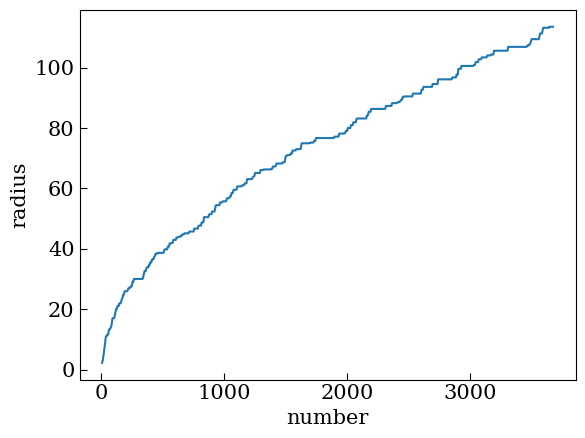

In [2]:
original_data = pd.read_csv(f"PH30056/dla.csv")
original_data.head()

plt.figure()
plt.plot(original_data["n"], original_data["r"])
plt.xlabel("number")
plt.ylabel("radius")
plt.show()

Data is then created for the generated fractals

Simulation generated in 27.43 seconds
p=1.0:	 1.666 ± 0.008
Simulation generated in 33.37 seconds
p=0.5:	 1.650 ± 0.008
Simulation generated in 50.16 seconds
p=0.1:	 1.612 ± 0.005
Simulation generated in 58.13 seconds
p=0.05:	 1.612 ± 0.004
Simulation generated in 92.93 seconds
p=0.01:	 1.704 ± 0.003


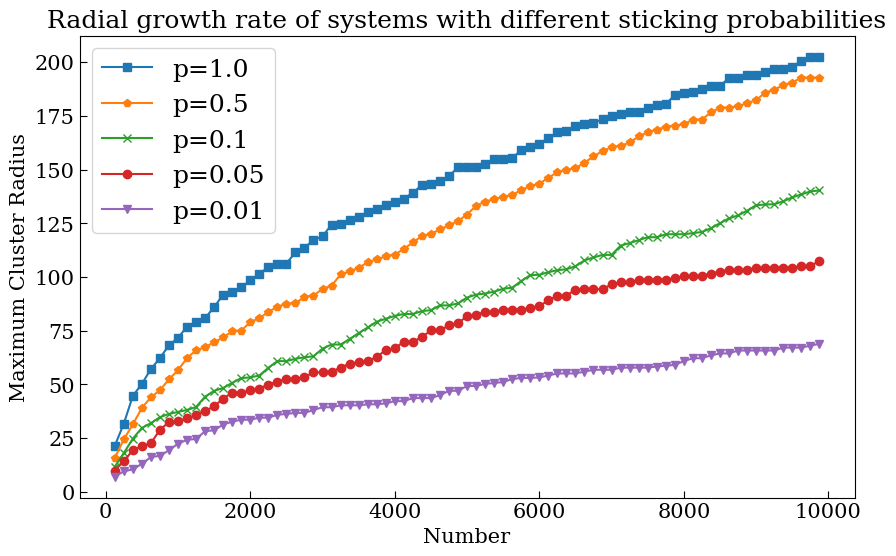

In [11]:
sticking_probabilities = [1.0, 0.5, 0.1, 0.05, 0.01]
marker = ['s', 'p', 'x', 'o', 'v']
number_of_walker = 10000
number_of_steps = 50000

fig = plt.figure(figsize=[10, 6])

for (i, p) in enumerate(sticking_probabilities):
    sim = DLA(number_of_walker, number_of_steps, p)
    d1 = sim.radial_dimension(0, 125, False)
    data = sim.radial_data
    plt.plot(data[0], data[1], label=f"p={p}", marker=marker[i], markersize=6)

    d1 = sim.boxcount_dimension(1, 100, 1, False)
    print(f"p={p}:\t {d1[0]:.3f} ± {d1[1]:.3f}")

plt.xlabel("Number")
plt.ylabel("Maximum Cluster Radius")
plt.title("Radial growth rate of systems with different sticking probabilities")
plt.legend()

plt.show()

There are now two datasets `original_data` and `dla_single_data`. For comparison, these will be plotted onto the same plot.

Simulation generated in 15.03 seconds
Simulation generated in 15.03 seconds


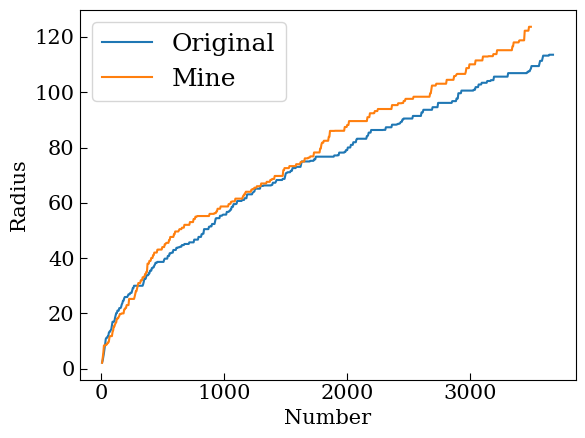

In [4]:
plt.figure()

simulation = DLA(3500, 25000, 1.0)
simulation.radial_dimension(0,5, False)
data = simulation.radial_data
print(f"Simulation generated in {simulation.time:.2f} seconds")

plt.plot(original_data['n'], original_data['r'], label="Original")
plt.plot(simulation.radial_data[0], simulation.radial_data[1], label="Mine")

plt.xlabel("Number")
plt.ylabel("Radius")
plt.legend()

plt.show()

Next, the log of both axes are plotted - these should follow a linear relationship

A line of best fit is applied to and used to calculate the fractal dimension of the two graphs.

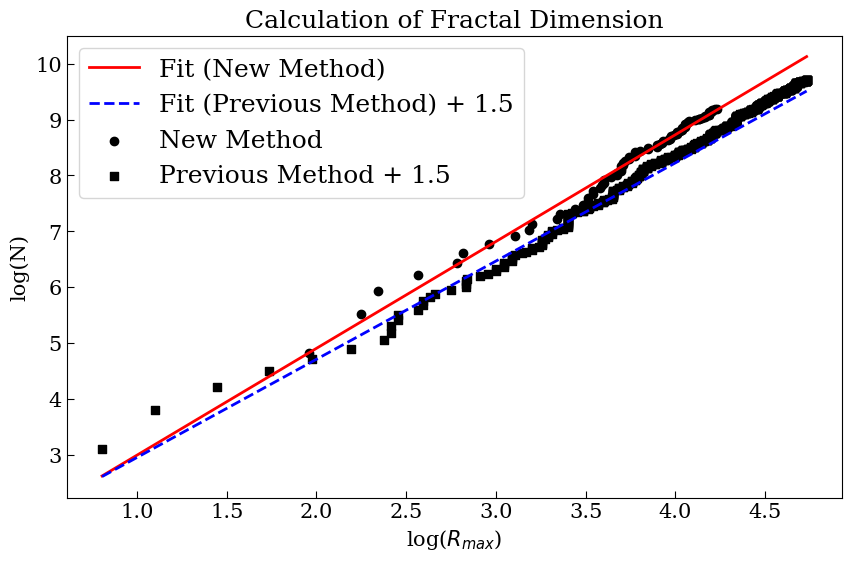

Fractal Dimension for DLA Single simulation	= 1.9112 ± 0.0251
Fractal Dimension for provided simulation	= 1.7568 ± 0.0231


In [13]:
fig = plt.figure(figsize=[10, 6])

[m1, c1], cov1 = np.polyfit(np.log(data[1]), np.log(data[0]), 1, cov=True)
[m2, c2], cov2 = np.polyfit(np.log(original_data['r'])[1:120], np.log(original_data["n"])[1:120], 1, cov=True)

plt.scatter(np.log(data[1]), np.log(data[0]), label="New Method", marker="o", color="black")
plt.scatter(np.log(original_data['r']), np.log(original_data['n'])+1.5, label="Previous Method + 1.5", marker="s", color="black")

plt.plot(np.log(original_data['r']), m1*np.log(original_data['r'])+c1, "r-", label="Fit (New Method)", linewidth=2)
plt.plot(np.log(original_data['r']), m2*np.log(original_data['r'])+c2+1.5, "b--", label="Fit (Previous Method) + 1.5", linewidth=2)

plt.xlabel("log($R_{max}$)")
plt.ylabel("log(N)")
plt.legend(loc="upper left")
plt.title("Calculation of Fractal Dimension")
plt.show()

print(f"Fractal Dimension for DLA Single simulation\t= {m1:.4f} ± {np.sqrt(cov1[0,0]):.4f}")
print(f"Fractal Dimension for provided simulation\t= {m2:.4f} ± {np.sqrt(cov2[0,0]):.4f}")

In [ ]:
#fig.savefig(figure_folder + "1.png", dpi=300, transparent=True, padding=0)

## Box Counting
Box counting is now used to calculate the fractal dimension. The number of occupied boxes is counted for a fractal, with the size of the boxes successively decreasing.

The number of points will calculate will saturate when the box width = the grid width. The box count for a simulated fractal will also saturate when the number of boxes = the number of points.

$d = \lim_{\epsilon->0} \frac{ \log N(\epsilon) }{ \log 1/\epsilon }$

Hence, the number of boxes should not exceed 70% of the $\sqrt N$.

Fractal patterns are stored as `output.csv.time` where time is the relative time of the pattern. An example pattern looks like:

Simulation generated in 13.80 seconds
Simulation generated in 37.57 seconds


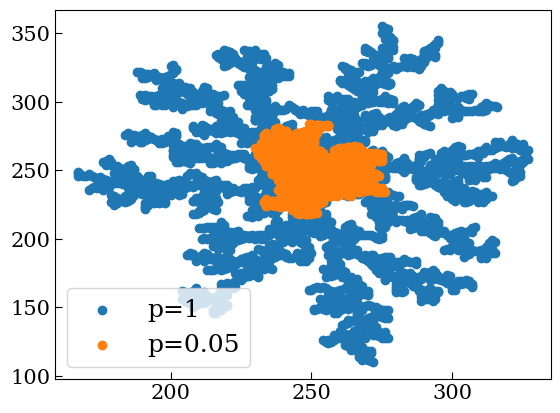

In [6]:
sim1 = DLA(3500, 20000, 1.0)
sim2 = DLA(3500, 20000, 0.01)

plt.figure()
plt.scatter(sim1.data['x'], sim1.data['y'], label="p=1")
plt.scatter(sim2.data['x'], sim2.data['y'], label="p=0.05")
plt.legend()
plt.show()

and, the fractal dimension can be calculated using the

By boxcounting sim1 has fractal dimension 1.429 and sim2 1.708
By radial size sim1 has 1.631 and sim2 2.302


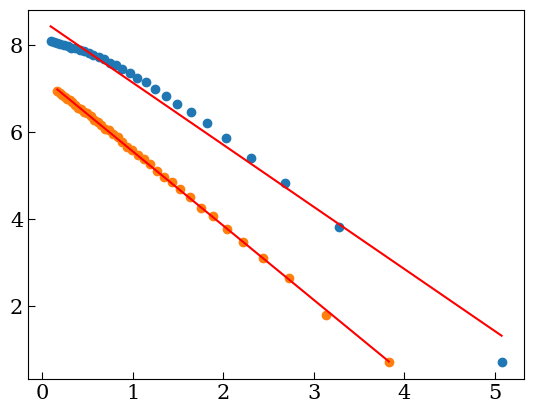

In [7]:
d1 = sim1.boxcount_dimension(1, 150, 5, True)[0]
d2 = sim2.boxcount_dimension(1, 40, 1, True)[0]

print(f"By boxcounting sim1 has fractal dimension {d1:.3f} and sim2 {d2:.3f}")
print(f"By radial size sim1 has {sim1.radial_dimension(5, 5, False)[0]:.3f} and sim2 {sim2.radial_dimension(5, 5, False)[0]:.3f}")

Simulation generated in 24.89 seconds
Simulation generated in 88.04 seconds


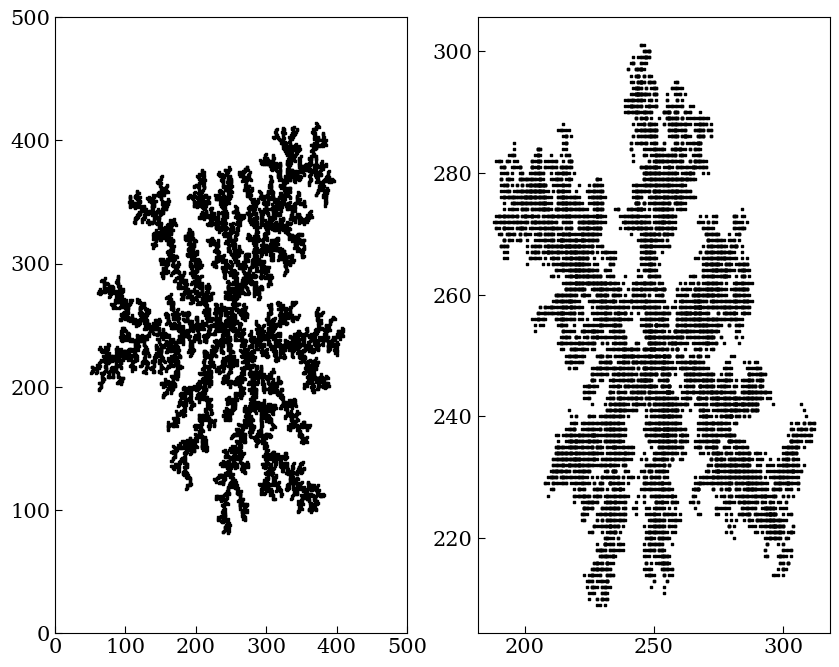

In [8]:
sim1 = DLA(10000, 50000, 1.0) #15000, 50000
sim2 = DLA(10000, 50000, 0.01)

plt.figure(figsize=[10, 8])
plt.subplot(1, 2, 1)
plt.scatter(sim1.data['x'], sim1.data['y'], label="p=1", marker="s", color="black", s=2)
plt.xlim([0, 500])
plt.ylim([0, 500])
plt.subplot(1, 2, 2)
plt.scatter(sim2.data['x'], sim2.data['y'], label="p=0.05", marker="s", color="black", s=2)
# plt.xlim([0, 500])
# plt.ylim([0, 500])
plt.show()

By box counting sim1 has fractal dimension 1.470 ± 0.073
[2.0442349971808738, 1.2040763654022176e-05]
By box counting sim2 has fractal dimension 1.618 ± 0.011
[1.9470415856901557, 2.2881297780601965e-05]


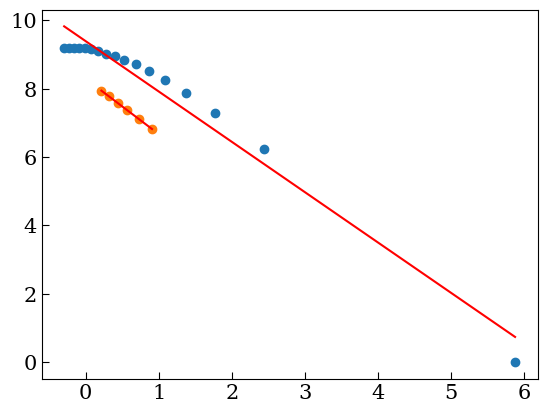

In [9]:
d1 = sim1.boxcount_dimension(1, 500, 30, True)
print(f"By box counting sim1 has fractal dimension {d1[0]:.3f} ± {d1[1]:.3f}")
print(sim1.radial_dimension(5, 5))

d2 = sim2.boxcount_dimension(50, 110, 10, True)
print(f"By box counting sim2 has fractal dimension {d2[0]:.3f} ± {d2[1]:.3f}")
print(sim2.radial_dimension(5, 5))
# print(f"By radial size sim1 has {sim1.radial_dimension(0, 5, True)[0]:.3f}")

Simulation generated in 29.64 seconds
By box counting sim1 has fractal dimension 1.707 ± 0.008
[1.9761417792751428, 1.7072924041156605e-05]


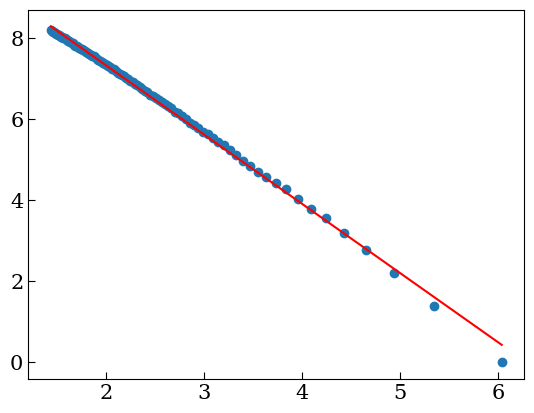

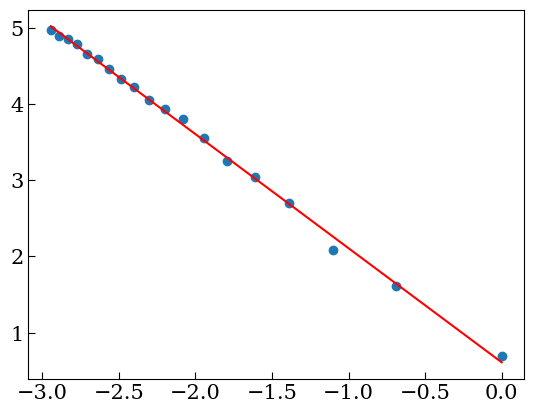

1.4982175322298048

In [10]:
sim1 = DLA(15000, 100000, 1.0) #15000, 50000

d1 = sim1.boxcount_dimension(1, 100, 1, True)
print(f"By box counting sim1 has fractal dimension {d1[0]:.3f} ± {d1[1]:.3f}")
print(sim1.radial_dimension(5, 5))

fractal_dimension("DLA/output.csv.19999", 1, 20, 1, True, False)
